# Linear regression 


In [7]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [3]:
#Hyper Parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.001


#Dataset
"""
x_train = torch.tensor([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
[10.791], [5.313], [7.997], [3.1]])

y_train = torch.tensor([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
[3.465], [1.65], [2.904], [1.3]])
"""
x_train = torch.rand(30, input_size).type(torch.FloatTensor)
y_train = torch.rand(30, output_size).type(torch.FloatTensor)


#linear regression model. Inherits nn.Module
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        #nn.Module.__init__(self)
        super(LinearRegression, self).__init__()
        #linear layer: applies a linear transformation to incoming data
        self.linear = nn.Linear(input_size, output_size) 
        
    #defines the computation performed at every call
    def forward(self, x):
        #apply linear transformation
        out = self.linear(x)
        return out


In [4]:
model = LinearRegression(input_size, output_size)

#Loss and Optimizer
#creates a criterion that measures the mean squared error 
#between n elements in the input x and target y
criterion = nn.MSELoss()
#optimizer, Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [5]:
#Train
for epoch in range(num_epochs):
    inputs = x_train
    targets = y_train
    
    #Forward + Backward + Optimize
    
    #clears the gradients of all optimized torch.Tensors 
    optimizer.zero_grad()
    #applies linear transformation (a call to model.forward(inputs) )
    output = model(inputs)
    #calculates RMS error between targets and output
    loss = criterion(output, targets)
    #accumulates the gradient for each parameter
    loss.backward()
    #updates parameters based on current gradients
    optimizer.step()
    
    if (epoch + 1) % 5 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, loss.data[0])) 


C:\Users\Juanig\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [5/1000], Loss: 0.0931
Epoch [10/1000], Loss: 0.0929
Epoch [15/1000], Loss: 0.0926
Epoch [20/1000], Loss: 0.0924
Epoch [25/1000], Loss: 0.0922
Epoch [30/1000], Loss: 0.0920
Epoch [35/1000], Loss: 0.0917
Epoch [40/1000], Loss: 0.0915
Epoch [45/1000], Loss: 0.0913
Epoch [50/1000], Loss: 0.0911
Epoch [55/1000], Loss: 0.0909
Epoch [60/1000], Loss: 0.0907
Epoch [65/1000], Loss: 0.0906
Epoch [70/1000], Loss: 0.0904
Epoch [75/1000], Loss: 0.0902
Epoch [80/1000], Loss: 0.0900
Epoch [85/1000], Loss: 0.0899
Epoch [90/1000], Loss: 0.0897
Epoch [95/1000], Loss: 0.0895
Epoch [100/1000], Loss: 0.0894
Epoch [105/1000], Loss: 0.0892
Epoch [110/1000], Loss: 0.0891
Epoch [115/1000], Loss: 0.0889
Epoch [120/1000], Loss: 0.0888
Epoch [125/1000], Loss: 0.0886
Epoch [130/1000], Loss: 0.0885
Epoch [135/1000], Loss: 0.0883
Epoch [140/1000], Loss: 0.0882
Epoch [145/1000], Loss: 0.0881
Epoch [150/1000], Loss: 0.0880
Epoch [155/1000], Loss: 0.0878
Epoch [160/1000], Loss: 0.0877
Epoch [165/1000], Loss: 0.08

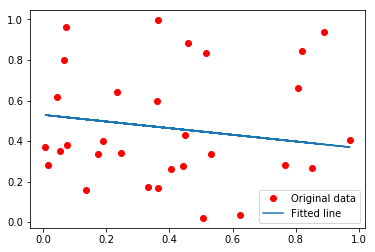

In [6]:
#Plot
predicted = model(x_train).data
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predicted.numpy(), label='Fitted line')
plt.legend()
plt.show()